In [109]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,precision_score,auc,confusion_matrix
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = "{:.2f}".format
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv('pima-indians-diabetes+%281%29.csv')
col = data.columns[:-1]  
data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [3]:
data["skin"].loc[data["skin"]>45] = 45
data.loc[:286,:].head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [4]:
from sklearn.impute import KNNImputer
import numpy as np
fill_na = KNNImputer(missing_values=0,n_neighbors=1,weights="uniform",metric='nan_euclidean')
df= pd.DataFrame(fill_na.fit_transform(data.iloc[:,:8]))
df["class"]=data["class"]

In [5]:
df.columns = data.columns

In [6]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6.00,148.00,72.00,35.00,126.00,33.60,0.63,50.00,1
1,1.00,85.00,66.00,29.00,106.00,26.60,0.35,31.00,0
2,8.00,183.00,64.00,33.00,325.00,23.30,0.67,32.00,1
3,1.00,89.00,66.00,23.00,94.00,28.10,0.17,21.00,0
4,11.00,137.00,40.00,35.00,168.00,43.10,2.29,33.00,1


In [7]:
data.isnull().value_counts()
data.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [8]:
data1 = data.groupby(["class"]).size().reset_index().rename(columns={0:"Count"})
data1 = data.drop("class",axis = 1).copy()

In [9]:
from sklearn.impute import SimpleImputer
SI1 = SimpleImputer(missing_values=0,strategy="most_frequent")
SI2 = SimpleImputer(missing_values=0,strategy="mean")
SI3 = SimpleImputer(missing_values=0,strategy="median")
data2=pd.DataFrame(SI1.fit_transform(data1),columns=col)
data2.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,6.00,148.00,72.00,35.00,105.00,33.60,0.63,50.00
1,1.00,85.00,66.00,29.00,105.00,26.60,0.35,31.00
2,8.00,183.00,64.00,45.00,105.00,23.30,0.67,32.00
3,1.00,89.00,66.00,23.00,94.00,28.10,0.17,21.00
4,1.00,137.00,40.00,35.00,168.00,43.10,2.29,33.00


In [10]:
data2["class"] = data["class"]
df=data2.copy()
data2.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6.00,148.00,72.00,35.00,105.00,33.60,0.63,50.00,1
1,1.00,85.00,66.00,29.00,105.00,26.60,0.35,31.00,0
2,8.00,183.00,64.00,45.00,105.00,23.30,0.67,32.00,1
3,1.00,89.00,66.00,23.00,94.00,28.10,0.17,21.00,0
4,1.00,137.00,40.00,35.00,168.00,43.10,2.29,33.00,1


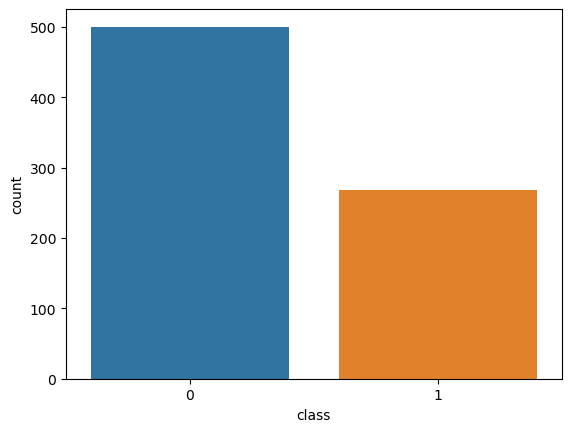

In [11]:
sns.countplot("class",data = df);

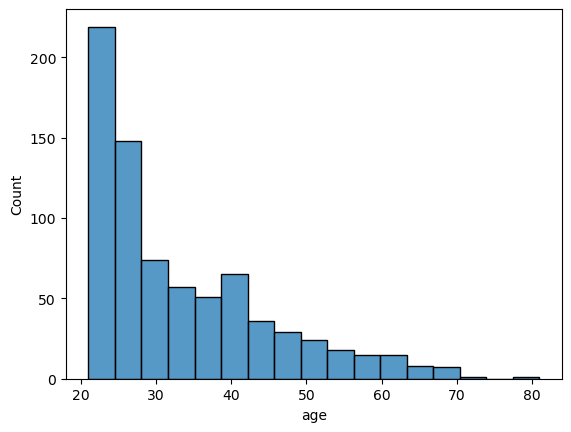

In [12]:
sns.histplot(x="age",data = df);


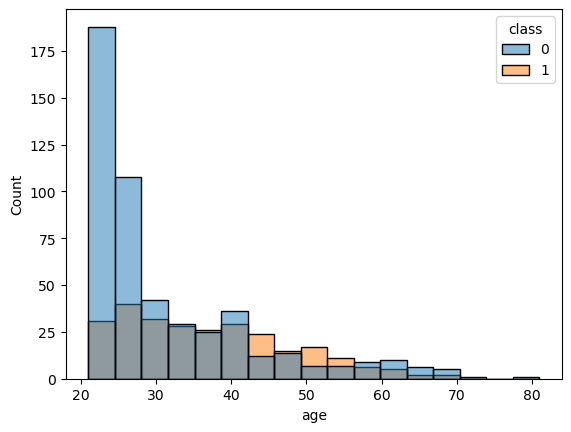

In [13]:
sns.histplot(x = df["age"],hue=df["class"]);

In [14]:
class Data_overviwe():
    def info_over(self,data):
        self.df = data
        self.info1 = pd.DataFrame(self.df.dtypes)
        self.info2 = pd.DataFrame(self.df.isnull().sum())
        self.corr = pd.DataFrame(self.df.mean())
        self.info4 = pd.DataFrame(self.df.std())
        self.info5 = pd.DataFrame(self.df.median())
        self.max = pd.DataFrame(self.df.max())
        self.upper_limit = pd.DataFrame(self.df.quantile(0.75)+ 1.5*(self.df.quantile(0.75)-self.df.quantile(0.25)))
        self.lower_limit = pd.DataFrame(self.df.quantile(0.25)- 1.5*(self.df.quantile(0.75)-self.df.quantile(0.25)))
        self.min = pd.DataFrame(self.df.min())
        self.info = pd.concat([self.info1,self.info2,self.corr,self.info4,self.info5,self.max,self.upper_limit,self.lower_limit,self.min],axis =1)
        self.info.columns = ["Data_type","Null_value","Mean","Std_Deviation","Median","Max","Upper_limit","Lower_limit","Min"]
        return self.info
    def outlier_remove(self):
        for i in df.columns:
            df[i]= np.where(self.df[i]>self.upper_limit.loc[i,0],self.upper_limit.loc[i,0],self.df[i])
            df[i]= np.where(self.df[i]<self.lower_limit.loc[i,0],self.lower_limit.loc[i,0],self.df[i])
#         return DV.info_over(df)
        return self.df
DV = Data_overviwe()
DV.info_over(df)

df = DV.outlier_remove()
df.head()


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6.00,148.00,72.00,35.00,105.00,33.60,0.63,50.00,1.00
1,1.00,85.00,66.00,29.00,105.00,26.60,0.35,31.00,0.00
2,8.00,183.00,64.00,45.00,105.00,23.30,0.67,32.00,1.00
3,1.00,89.00,66.00,23.00,94.00,28.10,0.17,21.00,0.00
4,1.00,137.00,40.00,35.00,160.62,43.10,1.20,33.00,1.00


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    float64
 1   Plas    768 non-null    float64
 2   Pres    768 non-null    float64
 3   skin    768 non-null    float64
 4   test    768 non-null    float64
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    float64
 8   class   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


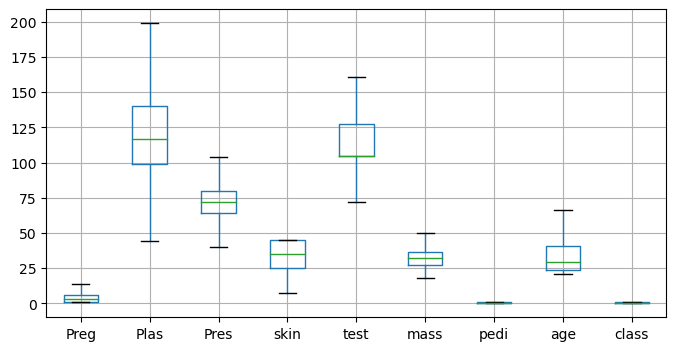

In [16]:
col = list[df[0:]]
df[col].boxplot(figsize=(8,4));

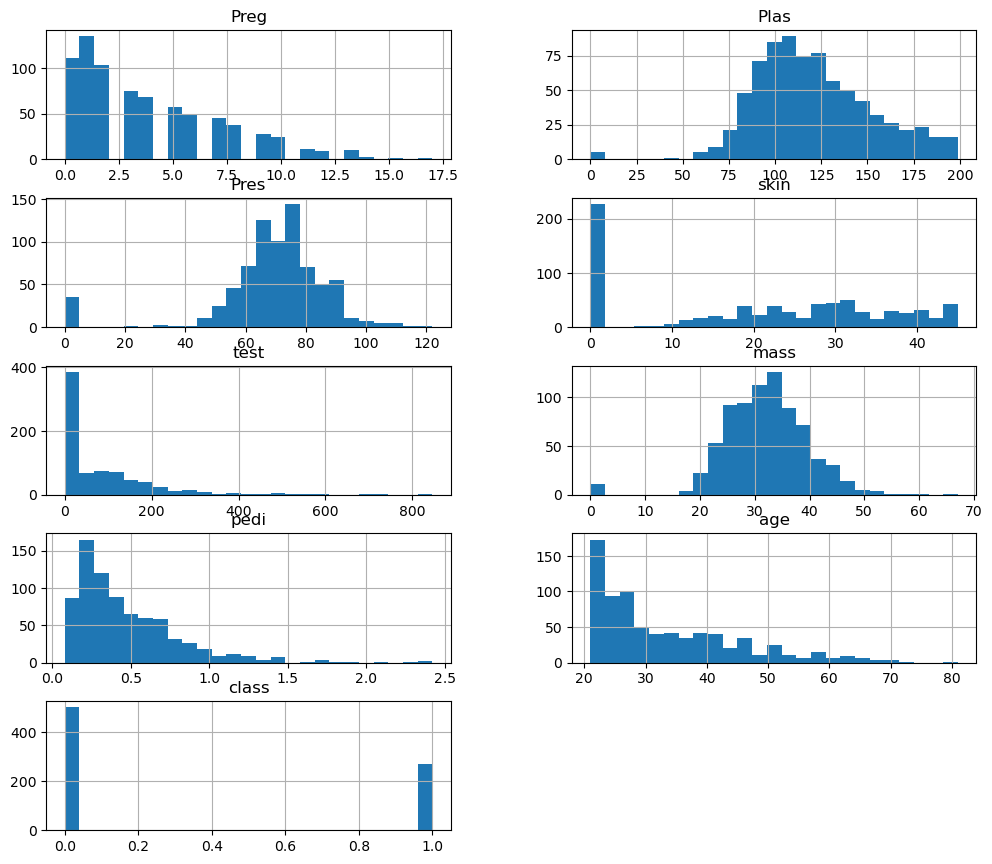

In [17]:
col = list(data[0:])
data[col].hist(stacked =False,bins = 25,figsize=(12,30),layout =(14,2));

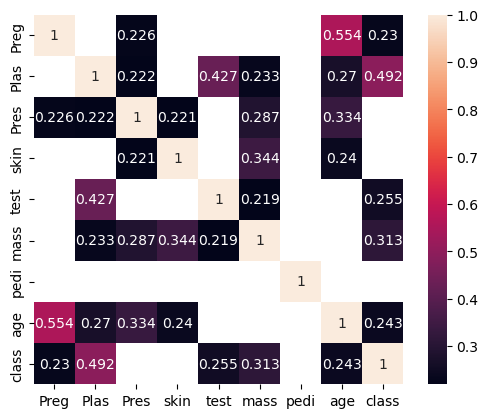

In [18]:
sns.heatmap(df.corr()[df.corr()>0.2],annot = True,fmt="0.3g",square=True);

In [19]:
data.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Plas,0.13,1.00,0.15,0.05,0.33,0.22,0.14,0.26,0.47
Pres,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
skin,-0.08,0.05,0.21,1.00,0.45,0.39,0.18,-0.13,0.07
test,-0.07,0.33,0.09,0.45,1.00,0.20,0.19,-0.04,0.13
mass,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
pedi,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
age,0.54,0.26,0.24,-0.13,-0.04,0.04,0.03,1.00,0.24
class,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


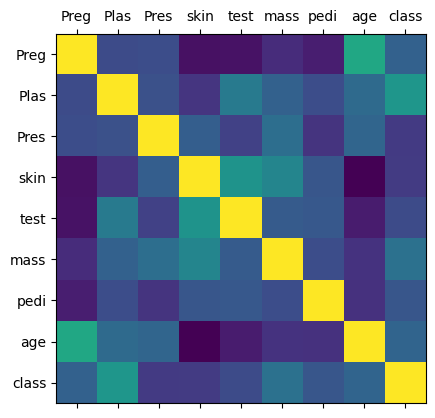

In [20]:
def plot(df):
    corr = df.corr()
    fig, ax = plt.subplots()
    ax.matshow(corr)
    plt.xticks(range(len(data.columns)),labels=data.columns)
    plt.yticks(range(len(data.columns)),labels = data.columns)
plot(data)

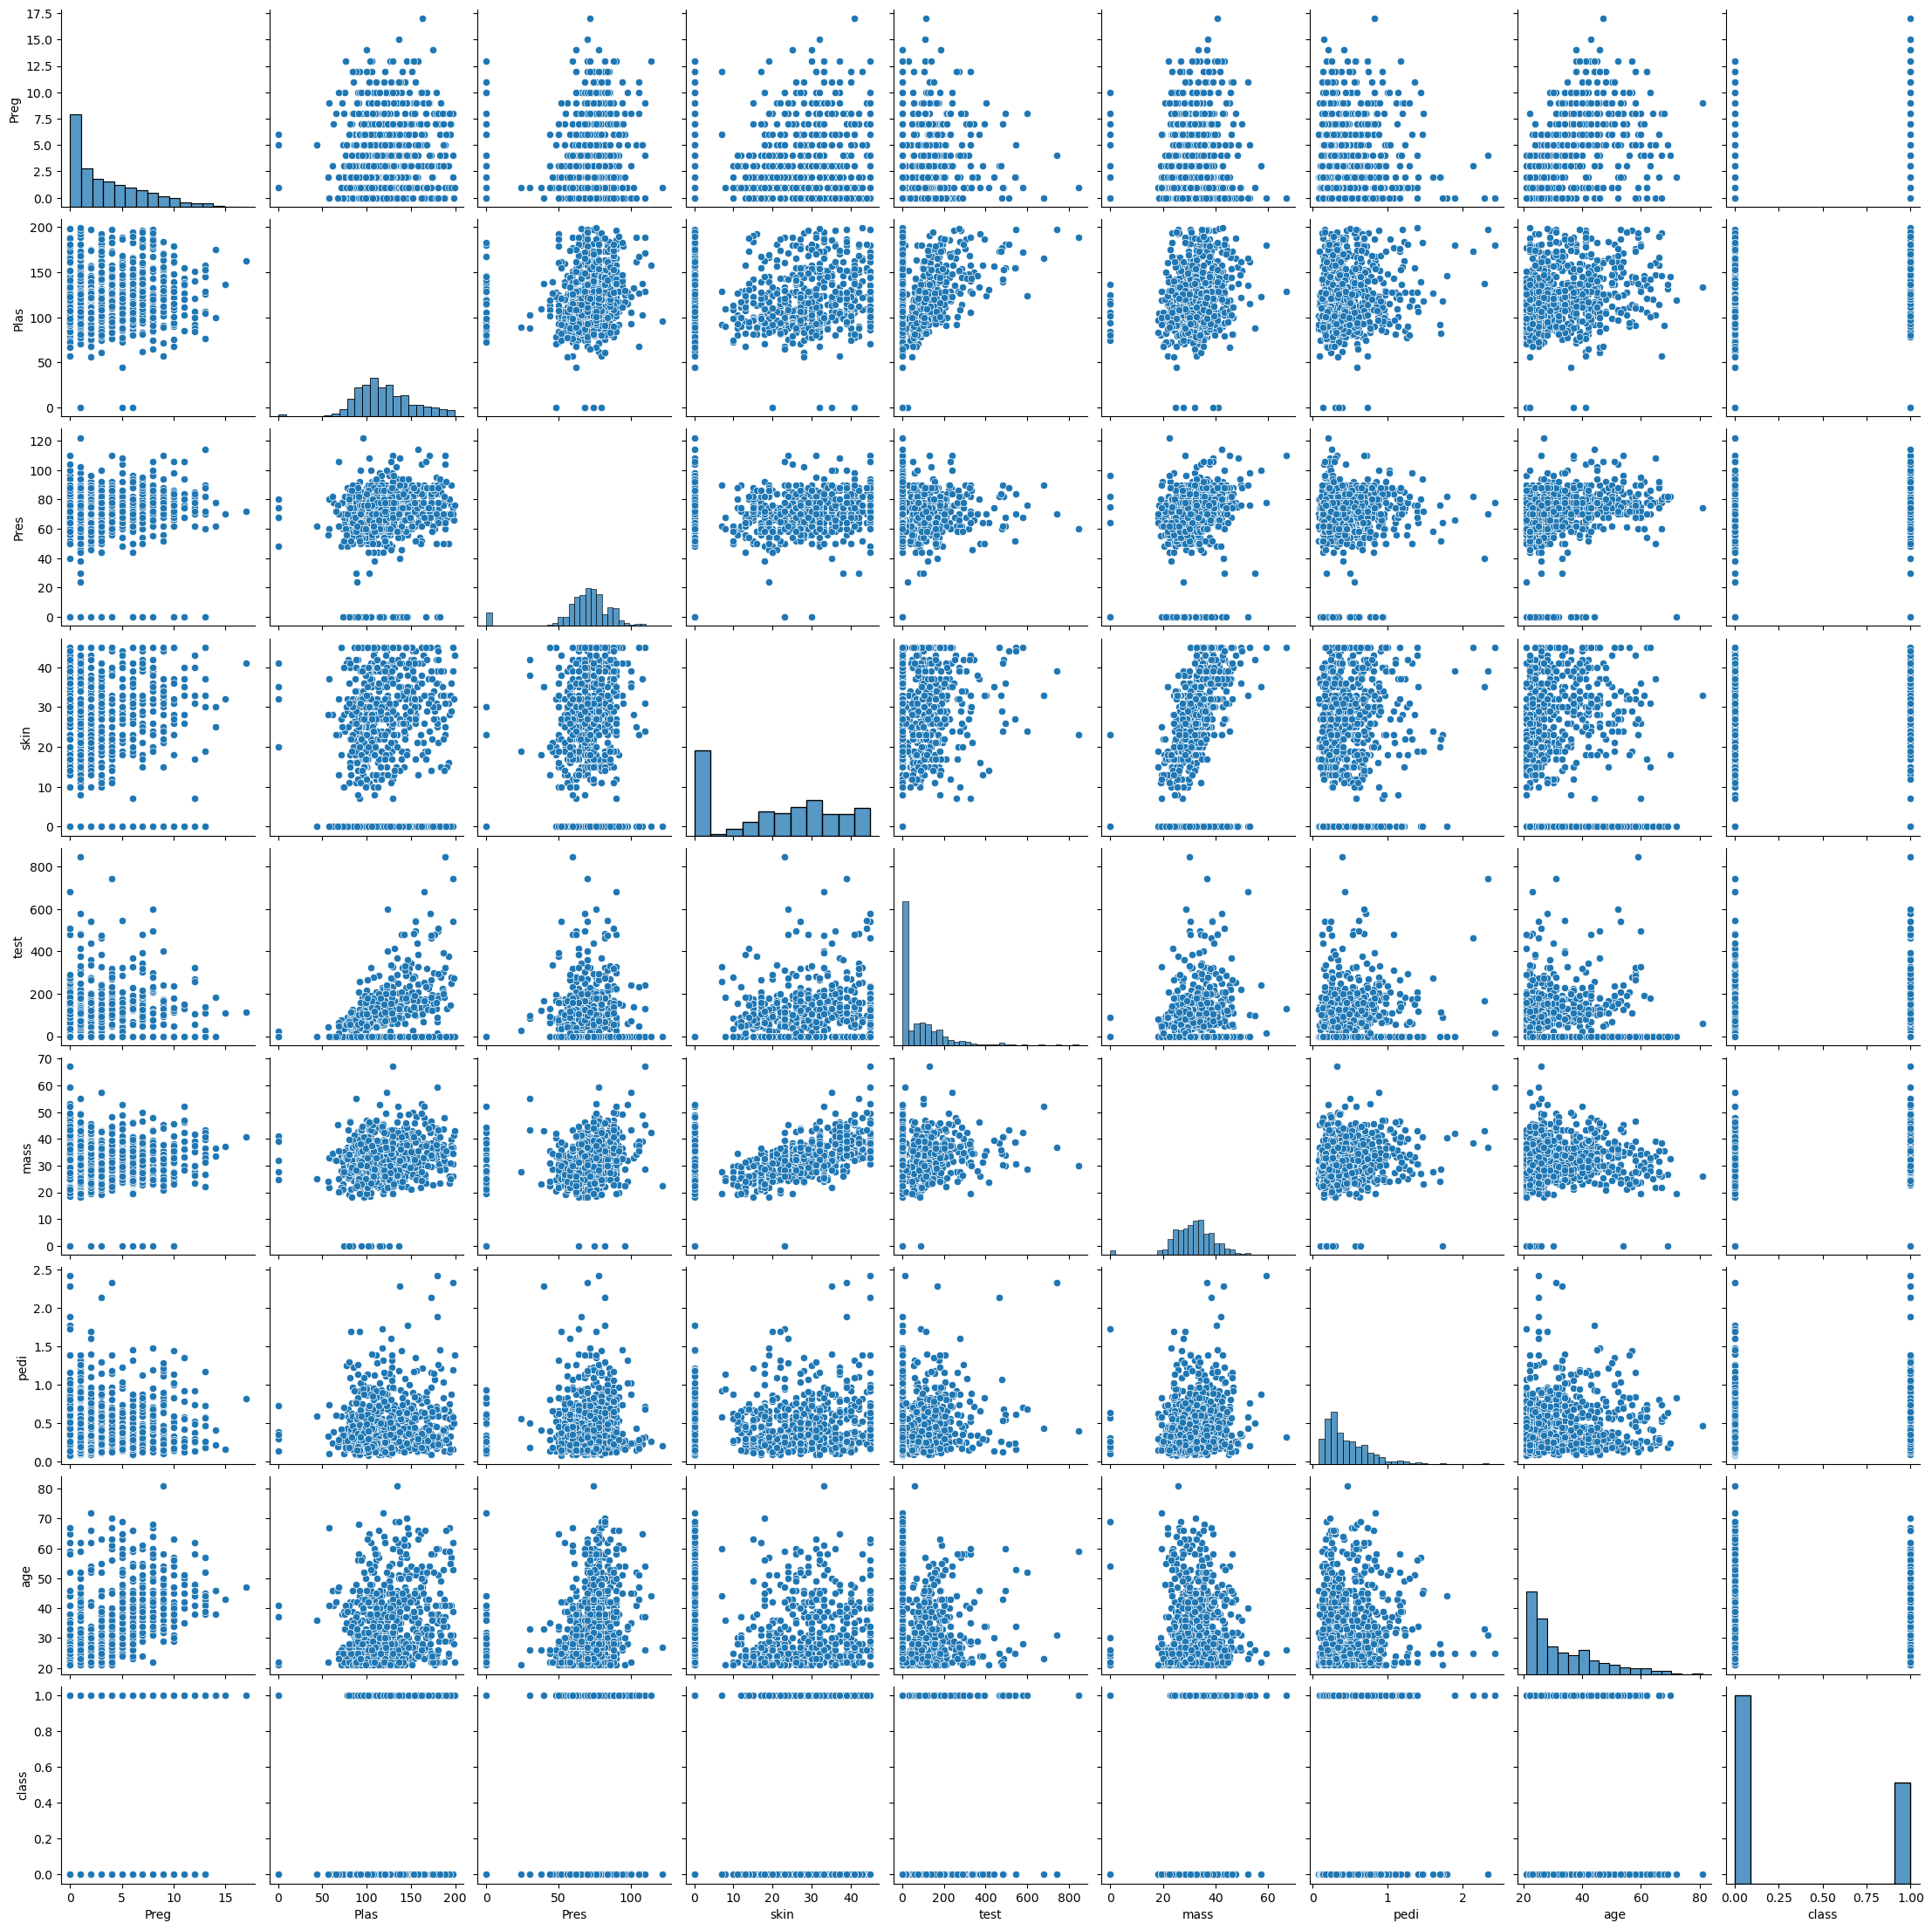

In [21]:
def hmap(df):
    sns.heatmap(df.corr(),annot = True,fmt="0.2g",linewidths=1,linecolor="red");
def pplot(df):
    sns.pairplot(df);
pplot(data)

In [22]:
ntrue = (data['class']==True).sum()
nfalse = (data["class"]==False).sum()
percentage_ntrue = (ntrue*100)/(ntrue+nfalse)
percentage_nfalse = (nfalse*100)/(ntrue+nfalse)
print(f"percentage of number of diabetes peitiant {percentage_ntrue} and percentage of non diabetes peitiant {percentage_nfalse} ")

percentage of number of diabetes peitiant 34.895833333333336 and percentage of non diabetes peitiant 65.10416666666667 


In [78]:
X = data.drop(["class"],axis = 1)
y= data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.60,0.63,50
1,1,85,66,29,0,26.60,0.35,31
2,8,183,64,0,0,23.30,0.67,32
3,1,89,66,23,94,28.10,0.17,21
4,0,137,40,35,168,43.10,2.29,33


In [79]:
print("original Diabetes True: {0} ({1:0.2f}%))".format(len(data.loc[data["class"]==1]),(len(data.loc[data['class']==1])/(len(data.index)))*100))
print("Trained diabetes value : {0}({1:0.2f}%)".format(((y_train[:]==1).sum()),((y_train[:]==1).sum()/(len(y_train[:])))*100))
print("Trained Diabetes Value is false : {0}({1:0.2f}%)".format(len(y_train[y_train[:]==0]),(len(y_train[y_train[:]==0])/(len(y_train[:])))*100))
print("Test Diabetes Value is a True: {0}({1:0.2f}%)".format(len(y_test[y_test[:]==1]),(len(y_test[y_test[:]==1])/(len(y_test[:])))*100))
print("Test Diabetes Value is False : {0}({1:0.2f}%)".format((len(y_test[y_test[:]==0])),(len(y_test[y_test[:]==0])/(len(y_test[:])))*100))


original Diabetes True: 268 (34.90%))
Trained diabetes value : 183(34.08%)
Trained Diabetes Value is false : 354(65.92%)
Test Diabetes Value is a True: 85(36.80%)
Test Diabetes Value is False : 146(63.20%)


In [80]:
print("Original diabetes True value: {0}({1:0.2f}%)".format((data["class"]==1).sum(),(data["class"]==1).sum()/(len(data.index))*100))
print("Train True:{0},({1:0.4f}%)".format((y_train[:]==1).sum(),(y_train[:]==1).sum()/(len(y_train[:]))*100))
print("train Faslse : {0},({1:0.4f}%)".format((y_train[:]==0).sum(),(y_train[:]==0).sum()/(len(y_train))*100))
print("test true:{0}({1:0.2f}%)".format((y_test[:]==1).sum(),(y_test[:]==1).sum()/(len(y_test[:]))*100))
print("test false :{0}({1:0.2f}%)".format((y_test[:]==0).sum(),(y_test[:]==0).sum()/(len(y_test[:]))*100))

Original diabetes True value: 268(34.90%)
Train True:183,(34.0782%)
train Faslse : 354,(65.9218%)
test true:85(36.80%)
test false :146(63.20%)


In [81]:
X_train.replace(0,X_train.mean())
print(X_train.head())
X.columns

     Preg  Plas  Pres  skin  test  mass  pedi  age
88     15   136    70    32   110 37.10  0.15   43
467     0    97    64    36   100 36.80  0.60   25
550     1   116    70    28     0 27.40  0.20   21
147     2   106    64    35   119 30.50  1.40   34
481     0   123    88    37     0 35.20  0.20   29


Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')

In [82]:
from sklearn.impute import KNNImputer
import numpy as np
X = [[6,2,4],[1,5,0],[4,44,0],[8,0,4]]
fill_na = KNNImputer(missing_values=0,n_neighbors=1,weights="uniform",metric='nan_euclidean')
x = pd.DataFrame(fill_na.fit_transform(X))
x

,0,1,2
0,6.00,2.00,4.00
1,1.00,5.00,4.00
2,4.00,44.00,4.00
3,8.00,2.00,4.00


In [83]:
X_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
88,15,136,70,32,110,37.10,0.15,43
467,0,97,64,36,100,36.80,0.60,25
550,1,116,70,28,0,27.40,0.20,21
147,2,106,64,35,119,30.50,1.40,34
481,0,123,88,37,0,35.20,0.20,29


In [66]:
# from sklearn.impute import IterativeImputer
# fill_0 = IterativeImputer(missing_values=0,strategy="median")
# X_train = pd.DataFrame(fill_0.fit_transform(X_train))
# X_test = pd.DataFramea(fill_0.fit_transform(X_test))
# X_train

In [67]:
# from sklearn.impute import SimpleImputer
# X_train.head()
# print(X_train.mean())

In [68]:
# print(X_train.head())
# print()
# from sklearn.impute import SimpleImputer
# rep_0 = SimpleImputer(missing_values=0,strategy="constant",fill_value=10)
# cols=X.columns
# X_train = pd.DataFrame(rep_0.fit_transform(X_train))
# X_test = pd.DataFrame(rep_0.fit_transform(X_test))

# # X_train.columns = cols
# # X_test.columns = cols

# X_train.head()


In [84]:
x_train = X_train
x_test = X_test

In [85]:
# print(X.columns)
# from sklearn.impute import SimpleImputer
# rep_0 = SimpleImputer(missing_values=0,strategy="most_frequent")
# col = X.columns
# X1_train = pd.DataFrame(rep_0.fit_transform(x_train))
# X1_test= pd.DataFrame (rep_0.fit_transform(x_test))
# X1_test.columns = col
# X1_train.columns = col
# X1_train.head()

In [88]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
Lg = LogisticRegression(solver="newton-cg")
Lg.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [89]:
y_predict = Lg.predict(X_test)
print((y_test[:]==1).sum())
print((y_predict[:]==1).sum())
accuracy = (((y_predict[:]==1).sum())/(y_test[:]==1).sum())
accuracy

85
63


0.7411764705882353

In [90]:
score_test = Lg.score(X_test,y_test)
score_train = Lg.score(X_train,y_train)
print(score_test,score_train)


0.7835497835497836 0.7728119180633147


In [91]:
confusion_matrix = metrics.confusion_matrix(y_test,y_predict );
confusion_matrix

array([[132,  14],
       [ 36,  49]], dtype=int64)

<AxesSubplot:>

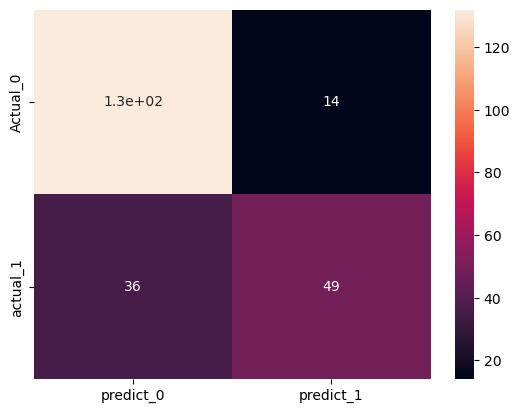

In [92]:
df_cm = pd.DataFrame(confusion_matrix,index=[i for i in ("Actual_0","actual_1")],columns=[i for i in ("predict_0","predict_1")])
sns.heatmap(df_cm,annot=True)

In [93]:
recall_score(y_test,y_predict)

0.5764705882352941

In [94]:
precision_score(y_test,y_predict)

0.7777777777777778

In [95]:
lr = sm.OLS(y_train,X_train).fit()

In [96]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  class   R-squared (uncentered):                   0.474
Model:                            OLS   Adj. R-squared (uncentered):              0.466
Method:                 Least Squares   F-statistic:                              59.60
Date:                Tue, 03 Jan 2023   Prob (F-statistic):                    5.28e-69
Time:                        08:30:52   Log-Likelihood:                         -300.40
No. Observations:                 537   AIC:                                      616.8
Df Residuals:                     529   BIC:                                      651.1
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Preg           0.0188      0.006      2.916      0.004       0.006       0.031
Plas           0.0037      0.001      5.997      0.000       0.002       0.005
Pres          -0.0051      0.001     -5.560      0.000      -0.007      -0.003
skin          -0.0007      0.002     -0.481      0.631      -0.004       0.002
test           0.0002      0.000      0.807      0.420      -0.000       0.001
mass           0.0054      0.002      2.200      0.028       0.001       0.010
pedi           0.0545      0.058      0.945      0.345      -0.059       0.168
age            0.0001      0.002      0.063      0.950      -0.004       0.004
==============================================================================
Omnibus:                      218.231   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.883
Skew:                           0.574   Prob(JB):                     4.45e-13
Kurtosis:                       1.893   Cond. No.                         574.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,mass,19.00
1,Plas,17.29
7,age,13.26
2,Pres,12.84
3,skin,4.14
6,pedi,3.23
0,Preg,3.10
4,test,2.26


In [98]:
X_train.drop(["mass","Plas","age","Pres"],axis = 1,inplace=True)


In [99]:
X_test.drop(["mass","Plas","age","Pres"],axis = 1,inplace=True)

In [100]:
Lg.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [101]:
confusionM = metrics.confusion_matrix(y_test,Lg.predict(X_test))
confusionM

array([[141,   5],
       [ 62,  23]], dtype=int64)

In [102]:
lr = sm.OLS(y_train,X_train).fit()

In [103]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  class   R-squared (uncentered):                   0.381
Model:                            OLS   Adj. R-squared (uncentered):              0.376
Method:                 Least Squares   F-statistic:                              81.95
Date:                Tue, 03 Jan 2023   Prob (F-statistic):                    3.39e-54
Time:                        08:31:11   Log-Likelihood:                         -344.22
No. Observations:                 537   AIC:                                      696.4
Df Residuals:                     533   BIC:                                      713.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Preg           0.0361      0.005      7.163      0.000       0.026       0.046
skin           0.0013      0.001      1.016      0.310      -0.001       0.004
test           0.0005      0.000      2.404      0.017    9.05e-05       0.001
pedi           0.2550      0.053      4.788      0.000       0.150       0.360
==============================================================================
Omnibus:                      177.480   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.050
Skew:                           0.586   Prob(JB):                     6.74e-13
Kurtosis:                       1.937   Cond. No.                         369.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"]= X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values,i) for i in range(x_train.shape[1])]

In [52]:
vif

,features,VIF
0,Preg,1.63
1,skin,2.66
2,test,2.00
3,pedi,2.36


In [105]:
Lg.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [110]:
confuiona = confusion_matrix(y_test,Lg.predict(X_test))

array([[141,   5],
       [ 62,  23]], dtype=int64)